In [1]:
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import cv2
import os
from sklearn.model_selection import train_test_split
import json

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.models import resnet18

from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

from math import sin, cos

## Датасет


In [2]:
json_dir = "./train/json/"

data_df = pd.DataFrame({'id': [], "left_top_x": [], 'left_top_y': [], "right_bottom_x": [], 'right_bottom_y': [], 'angle': []})

json_true = []
for _, _, files in os.walk(json_dir):
    for x in files:
        if x.endswith(".json"):
            data = json.load(open(json_dir + x))
            new_row = {'id':x.split(".")[0]+".img", 'left_top_x':data["left_top"][0], 'left_top_y':data["left_top"][1], 'right_bottom_x': data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1], 'angle': data["angle"]}
            data_df = data_df.append(new_row, ignore_index=True)


/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
/tmp/ipykernel_245661/4050073943.py:11: FutureWarning: The frame.append method is deprec

In [3]:
data_df['width'] = (data_df['right_bottom_x'] - data_df['left_top_x']).abs()
data_df['height'] = (data_df['right_bottom_y'] - data_df['left_top_y']).abs()
data_df['center_x'] = ((data_df['right_bottom_x'] + data_df['left_top_x']) * 0.5).astype(int)
data_df['center_y'] = ((data_df['right_bottom_y'] + data_df['left_top_y']) * 0.5).astype(int)
data_df['id'] = data_df['id'].apply(lambda s: './train/img/' + s.split('.')[0]+'.png')
data_df[['width','height','angle']].describe()

width       height       angle
count   800.000000   800.000000  800.000000
mean    919.356250   926.186250  183.107500
std     447.666395   440.886173  105.093884
min       0.000000     0.000000    0.000000
25%     543.000000   565.000000   90.750000
50%    1024.000000  1024.000000  183.500000
75%    1333.000000  1343.000000  273.000000
max    1449.000000  1449.000000  359.000000

In [4]:
img1 = cv2.imread('./train/img/651.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = Image.open('./train/img/651.png')

In [5]:
data_df.head(5)

id  left_top_x  left_top_y  right_bottom_x  \
0   ./train/img/651.png      9372.0       982.0          9623.0   
1   ./train/img/768.png      1888.0      9340.0          3305.0   
2   ./train/img/454.png      4001.0      9272.0          2624.0   
3  ./train/img/1105.png      2642.0      1581.0          4089.0   
4   ./train/img/597.png      8652.0      2077.0          9965.0   

   right_bottom_y  angle   width  height  center_x  center_y  
0          2409.0   35.0   251.0  1427.0      9497      1695  
1          9039.0  303.0  1417.0   301.0      2596      9189  
2          8825.0  153.0  1377.0   447.0      3312      9048  
3          1632.0  317.0  1447.0    51.0      3365      1606  
4          1464.0  290.0  1313.0   613.0      9308      1770

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
original = np.array(Image.open('./original.tiff'))

/home/sergeif/.local/lib/python3.8/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (110166016 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [7]:
original.shape

(10496, 10496, 3)

(1024, 1024, 3) (1024, 1024, 3)


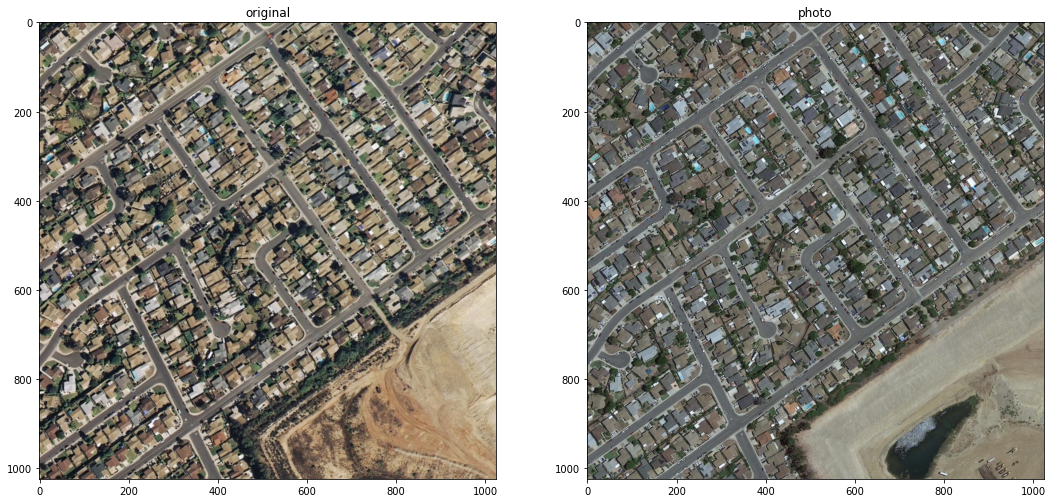

In [8]:
import numpy as np
import cv2

def rotate_image(image, point, angle):
    rot_mat = cv2.getRotationMatrix2D(point, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def get_fragment(center_x, center_y, angle, size_m=1):
    image_center = (center_x, center_y)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
    
    fragment = rotate_image(original, image_center, angle)
    
    new_min_x = max(cntr[0]-512*size_m, 0)
    new_max_x = min(cntr[0]+512*size_m, 10496)
    new_min_y = max(cntr[1]-512*size_m, 0)
    new_max_y = min(cntr[1]+512*size_m, 10496)

    return fragment[int(new_min_y):int(new_max_y), int(new_min_x):int(new_max_x)]

def plot_ex(i):    
    fragment = get_fragment((data_df.iloc[i].left_top_x + data_df.iloc[i].right_bottom_x)*0.5, 
                            (data_df.iloc[i].left_top_y + data_df.iloc[i].right_bottom_y)*0.5, 
                            data_df.iloc[i].angle)
    fig, ax = plt.subplots(1,2,figsize=(18,9))
    ax[0].imshow(fragment)
    ax[0].set_title('original')
    img = np.array(Image.open(data_df.iloc[i]['id']))
    ax[1].imshow(img)
    ax[1].set_title('photo');
    print(img.shape, fragment.shape)
plot_ex(0)

In [19]:
import random

def get_fragment_img(img, center_x, center_y, angle, size_m=1):
    image_center = (center_x, center_y)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
    
    fragment = rotate_image(img, image_center, angle)
    
    new_min_x = max(cntr[0]-512*size_m, 0)
    new_max_x = min(cntr[0]+512*size_m, 10496)
    new_min_y = max(cntr[1]-512*size_m, 0)
    new_max_y = min(cntr[1]+512*size_m, 10496)

    return fragment[int(new_min_y):int(new_max_y), int(new_min_x):int(new_max_x)]

class ImageDatasetGrid(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        
        
        param_grid = []
        cx = random.randint(0,256)
        cy = random.randint(0,256)
        for x in range(512*3+cx,10496-512*3+1, 256):
            for y in range(512*3+cy, 10496-512*3+1, 256):
                angle = random.randint(0,360)
                param_grid.append((x,y,angle))
        self.param_grid = param_grid

    def __getitem__(self, idx):        
        cx,cy,ca = self.param_grid[idx]
        
        patch = get_fragment(cx, cy, 0, 3)
        
        patch_x = random.randint(-512,513)
        patch_y = random.randint(-512,513)
        image = get_fragment(cx+patch_x, cy+patch_y, ca)
                        
        labels = ((512*3 + patch_x) / patch.shape[0], (512*3 + patch_y) / patch.shape[1], ca / 360)
                
        if self.transform is not None:
            image = self.transform(images=[image])[0]
            image = iaa.Affine(scale=(1/3.0,1/3.0))(images=[image])[0]
        image = transforms.ToTensor()(image)
        image = transforms.Resize((1024,1024))(image)
        #image = self.norm(image)
        
        patch = transforms.ToTensor()(patch)
        patch = transforms.Resize((1024,1024))(patch)
        #patch = self.norm(patch)
        
        return image, patch, torch.tensor(labels).float()
    
    def __len__(self):
        return len(self.param_grid)

In [38]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.AddToBrightness((-10,10)),
    iaa.Clouds(),
    #iaa.Sometimes(0.99, iaa.imgcorruptlike.Spatter(severity=3))
])

train_dataset = ImageDatasetGrid(seq)

t = 0
for x in train_dataset:
    if t < 7:
        t+=1
        continue
    break

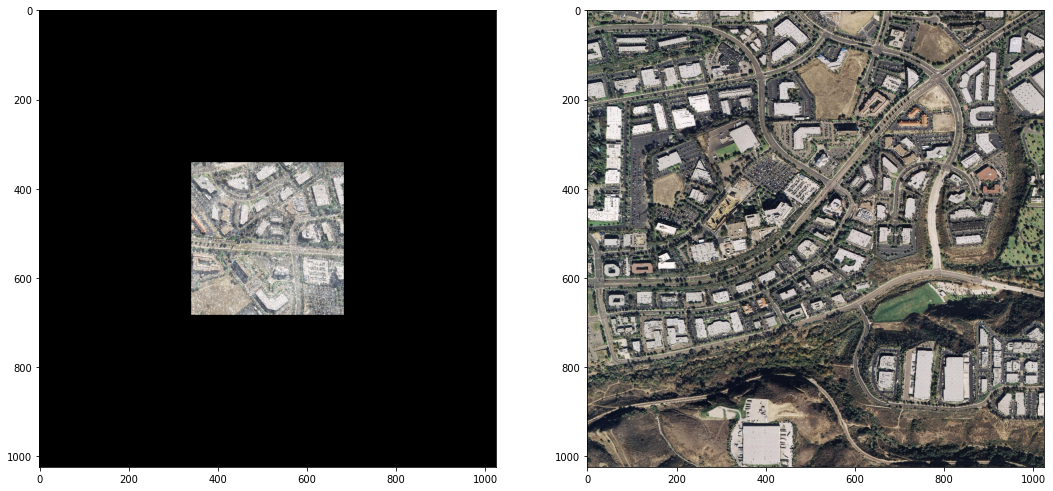

In [39]:
fig, ax = plt.subplots(1,2,figsize=(18,12))

img = transforms.ToPILImage()(x[0])
patch = transforms.ToPILImage()(x[1])
ax[0].imshow(img)
ax[1].imshow(patch)

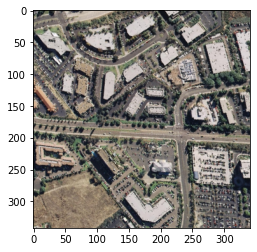

In [40]:
a = np.array(patch)
plt.imshow(get_fragment_img(a, x[2][0].item() * 1024, 
                               x[2][1].item() * 1024, 
                               x[2][2].item() * 360, 1/3.0))

In [13]:
import cnn_geometric_model as cgm
import torch
import torch.nn as nn

normalize_features = True
normalize_matches = True
FeatureExtraction = cgm.FeatureExtraction(use_cuda=True, feature_extraction_cnn='resnet101')
FeatureExtraction2 = cgm.FeatureExtraction(use_cuda=True, feature_extraction_cnn='resnet101')
Feature2Pearson = cgm.Feature2Pearson()
FeatureL2Norm = cgm.FeatureL2Norm()
FeatureMasking = cgm.FeatureMasking()
FeatureCorrelation = cgm.FeatureCorrelation()
ReLU = nn.ReLU(inplace=True)

In [14]:
class FeatureRegression(nn.Module):
    def __init__(self, output_dim=3):
        super(FeatureRegression, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(4096, 1024, kernel_size=9, padding=0),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 128, kernel_size=7, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=5, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.linear = nn.Linear(135424, output_dim)

    def forward(self, x):
        x = self.conv(x)
        x = x.reshape((x.size(0), 135424))
        x = self.linear(x)
        return x

In [15]:
import time
import tqdm

model = FeatureRegression()
model.load_state_dict(torch.load('feat_regr_3.pth'))
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

model.train()
optimizer.zero_grad()

step,acum_steps = 0,8
for epoch in range(10000):
    train_dataset = ImageDatasetGrid(seq)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=1,
                                               shuffle=True,
                                               pin_memory=True,
                                               num_workers=0)
    train_losses = []
    for img, patch, labels in train_loader:
        with torch.no_grad():
            feature_A = FeatureExtraction(img.cuda())
            feature_B = FeatureExtraction(patch.cuda())
            feature_A = Feature2Pearson(feature_A)
            feature_B = Feature2Pearson(feature_B)
            correlation = FeatureCorrelation(feature_A,feature_B)
            correlation = FeatureL2Norm(ReLU(correlation))

        labels = labels.cuda()
        y_pred = model(correlation)
        #y_pred = y_pred.squeeze()
        #print(y_pred, labels)

        x_center_pred = y_pred[:,0]
        y_center_pred = y_pred[:,1]

        x_center_true = labels[:,0]
        y_center_true = labels[:,1]

        x_metr = torch.abs(x_center_pred - x_center_true)
        y_metr = torch.abs(y_center_pred - y_center_true)

        angle_true = labels[:,2]
        angle_pred = y_pred[:,2] 

        a_metr = torch.abs(angle_true - angle_pred)

        loss = torch.mean(0.35 * x_metr + 0.35 * y_metr + 0.3 * a_metr) / acum_steps
        train_losses.append(loss.item() * acum_steps)
        #print(loss.item() * acum_steps)

        loss.backward()
        step += 1
        if step % acum_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
    
    print(epoch, np.mean(train_losses))
    torch.save(model.state_dict(), 'feat_regr_3.pth')

0 0.037947617529356555
1 0.04179206634132473


KeyboardInterrupt: 

In [195]:
import cnn_geometric_model as cgm
import torch
import torch.nn as nn



class FeatureRegression(nn.Module):
    def __init__(self, output_dim=3):
        super(FeatureRegression, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(4096, 1024, kernel_size=9, padding=0),
            nn.BatchNorm2d(1024),
            nn.ReLU(inplace=True),
            nn.Conv2d(1024, 128, kernel_size=7, padding=0),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=5, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.linear = nn.Linear(135424, output_dim)

    def forward(self, x):
        x = self.conv(x)
        x = x.reshape((x.size(0), 135424))
        x = self.linear(x)
        return x
    
class PathChecker():
    def __init__(self):
        super(PathChecker, self).__init__()
        self.FeatureExtraction = cgm.FeatureExtraction(use_cuda=True, feature_extraction_cnn='resnet101')
        self.Feature2Pearson = cgm.Feature2Pearson()
        self.FeatureL2Norm = cgm.FeatureL2Norm()
        self.FeatureMasking = cgm.FeatureMasking()
        self.ReLU = nn.ReLU(inplace=True)
        
        self.FeatureRegression = FeatureRegression()
        self.FeatureRegression.load_state_dict(torch.load('feat_regr_3.pth'))
        self.FeatureRegression = self.FeatureRegression.cuda()
        
        self.original = np.array(Image.open('./original.tiff'))
        self.norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
        
        

    def check(self, image, cx, cy):
        image = iaa.Affine(scale=(1/3.,1/3.))(images=[image])[0]
        image = transforms.ToTensor()(image)
        image = transforms.Resize((1024,1024))(image)
        image = self.norm(image)
        
        with torch.no_grad():
            feature_A = FeatureExtraction(image.unsqueeze(0).cuda())
            feature_A = Feature2Pearson(feature_A)
            
        preds = []
        for center_x in range(cx - 10, cx + 11, 5):
            #if (center_x < 0) | (center_x > self.original.shape[1] - 512*3):
            #    continue
            for center_y in range(cy - 10, cy + 11, 5):
                #if (center_y < 0) | (center_y > self.original.shape[1] - 512*3):
                #    continue

                rot_mat = cv2.getRotationMatrix2D((center_x, center_y), 0, 1.0)
                cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
                fragment = rotate_image(self.original, (center_x, center_y), 0)

                new_min_x = max(cntr[0]-512*3, 0)
                new_max_x = min(cntr[0]+512*3, 10496)
                new_min_y = max(cntr[1]-512*3, 0)
                new_max_y = min(cntr[1]+512*3, 10496)
                
                patch = fragment[int(new_min_y):int(new_max_y), int(new_min_x):int(new_max_x)]
                pys = patch.shape[0]
                pxs = patch.shape[1]
                #if (pxs != 3072) | (pys != 3072):
                #    continue
                patch_x = new_min_x
                patch_y = new_min_y
                #print(center_x, center_y, patch_x, patch_y)
                
                patch = transforms.ToTensor()(patch)
                patch = transforms.Resize((1024,1024))(patch)
                patch = self.norm(patch)
                
                with torch.no_grad():
                    feature_B = FeatureExtraction(patch.unsqueeze(0).cuda())
                    feature_B = Feature2Pearson(feature_B)
                    correlation = FeatureCorrelation(feature_A,feature_B)
                    correlation = FeatureL2Norm(ReLU(correlation))
                    
                    pred = self.FeatureRegression(correlation).squeeze()
                    x,y,a = pred[0].item()*pxs+patch_x, pred[1].item()*pys+patch_y, pred[2].item()*360
                    preds.append((x,y,a))
        return preds

In [196]:
pc = PathChecker()

/home/sergeif/.local/lib/python3.8/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (110166016 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [197]:
img = np.array(Image.open('./train/img/229.png'))
#img = get_fragment(9308, 1770, 290)
ps = pc.check(img, 1893+500, 6320+500)

In [198]:
qdf = pd.DataFrame(ps)
qdf.columns = ['cx','cy','angle']
qdf.describe()

cx           cy       angle
count    25.000000    25.000000   25.000000
mean   1991.332201  6254.847197  232.482839
std      44.361601    36.523008    6.446952
min    1920.667145  6200.116302  219.761388
25%    1950.948608  6226.400391  227.997015
50%    1986.136200  6240.966888  232.699785
75%    2010.188293  6278.421326  239.076619
max    2087.530060  6353.596924  242.133093

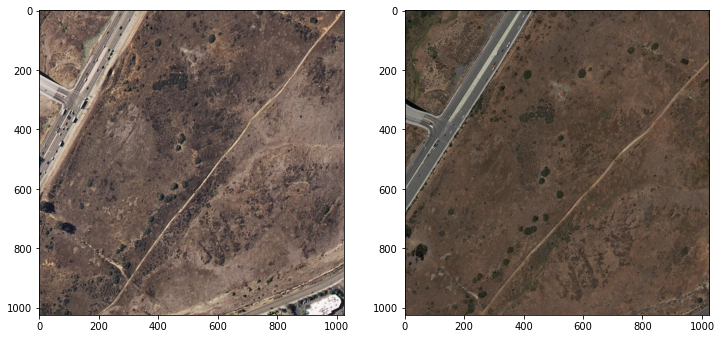

In [199]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(get_fragment(qdf.cx.mean(), qdf.cy.mean(), qdf.angle.mean()))
ax[1].imshow(np.array(Image.open('./train/img/229.png')))

In [200]:
class MultiModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.mnet = models.mobilenet_v3_small(pretrained=True)
        self.cnext = models.convnext_small(pretrained=True)
        self.efnet = models.efficientnet_b4(pretrained=True)
        self.head = nn.Sequential(
            nn.LayerNorm(576+1792+768),
            nn.Linear(576+1792+768,1024),
            nn.SiLU(),
            nn.LayerNorm(1024),
            nn.Linear(1024,1024),
            nn.SiLU(),
            nn.LayerNorm(1024),
            nn.Linear(1024, 3)
        )

    def forward(self, x):
        x1 = self.mnet.avgpool(self.mnet.features(x)).flatten(start_dim=1) #1024+1792+768
        x2 = self.efnet.avgpool(self.efnet.features(x)).flatten(start_dim=1)
        x3 = self.cnext.avgpool(self.cnext.features(x)).flatten(start_dim=1)
        x = torch.cat([x1,x2,x3],dim=-1)
        return x, self.head(x)
    
model = MultiModel()
model.load_state_dict(torch.load('multi_model.pth'))
model = model.cuda()

cos = nn.CosineSimilarity(dim=0)

t_seq = iaa.Sequential([
    iaa.Resize((512,512))
])

import glob

class ImageDatasetTrain(Dataset):
    def __init__(self, transform=None):
        self.files = glob.glob('./train/img/*')
        self.transform = transform
        self.norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])

    def __getitem__(self, idx):
        fl = self.files[idx]
        center_x = data_df.loc[data_df['id'] == fl].center_x.astype(float).values[0]
        center_y = data_df.loc[data_df['id'] == fl].center_y.astype(float).values[0]
        c_angle = data_df.loc[data_df['id'] == fl].angle.astype(float).values[0]
        image = np.array(Image.open(self.files[idx]))
        if self.transform is not None:
            image = self.transform(images=[image])[0]
        image = transforms.ToTensor()(image)
        image = self.norm(image)

        orig =  get_fragment(center_x, center_y, c_angle)
        if self.transform is not None:
            orig = self.transform(images=[orig])[0]
        orig = transforms.ToTensor()(orig)
        orig = self.norm(orig)
        
        return image, self.files[idx], orig
    
    def __len__(self):
        return len(self.files)

t_dataset = ImageDatasetTrain(t_seq)

x_metr, y_metr, a_metr = [], [], []
x_metr2, y_metr2, a_metr2 = [], [], []

model.eval()
preds,preds2 = [],[]
with torch.no_grad():
    for img, fle, orig in t_dataset:
        _, y_pred = model(img.unsqueeze(0).float().cuda())
        
        center_x = data_df.loc[data_df['id'] == fle].center_x.astype(float).values[0]
        center_y = data_df.loc[data_df['id'] == fle].center_y.astype(float).values[0]
        c_angle = data_df.loc[data_df['id'] == fle].angle.astype(float).values[0]
        
        y_pred = y_pred.squeeze().clip(0,1)
        
        x0, y0, a0 = y_pred[0].item(), y_pred[1].item(), y_pred[2].item()
        
        preds.append((fle,x0,y0,a0))
        x_metr.append(abs(x0-center_x / 10496.0))
        y_metr.append(abs(y0-center_y / 10496.0))
        a_metr.append(abs(a0-c_angle / 360.0))
        #print(round(x_metr[-1]*0.35+y_metr[-1]*0.35+a_metr[-1]*0.3, 3))
        
        img = np.array(Image.open(fle))
        x0 = min(10496-1536, max(x0,0))
        y0 = min(10496-1536, max(y0,0))
        ps = pc.check(img, int(x0*10496), int(y0*10496))
        qdf = pd.DataFrame(ps)
        qdf.columns = ['cx','cy','angle']
        x_metr2.append(abs(qdf.cx.mean()-center_x) / 10496.0)
        y_metr2.append(abs(qdf.cy.mean()-center_y) / 10496.0)
        a_metr2.append(abs(qdf.angle.mean()-c_angle) / 360.0)
        print(round(x_metr[-1]*0.35+y_metr[-1]*0.35+a_metr[-1]*0.3, 3), 'vs',
              round(x_metr2[-1]*0.35+y_metr2[-1]*0.35+a_metr2[-1]*0.3, 3))
        preds2.append((fle,qdf.cx.mean(), qdf.cy.mean(), qdf.angle.mean()))
        
metric = np.array(x_metr) *0.35 + np.array(y_metr) *0.35 + np.array(a_metr) *0.3

print(np.mean(metric))
print(round(np.mean(x_metr),3),
      round(np.mean(y_metr),3),
      round(np.mean(a_metr),3))

0.071 vs 0.046
0.129 vs 0.126
0.015 vs 0.017
0.14 vs 0.126
0.025 vs 0.035


KeyboardInterrupt: 

In [188]:
ps

[]

In [176]:
0.071 vs 0.046
0.129 vs 0.126
0.015 vs 0.019
0.14 vs 0.126
0.025 vs 0.037
0.123 vs 0.172


0.7640507817268372

In [129]:
data_df.sample()

id  left_top_x  left_top_y  right_bottom_x  \
96  ./train/img/229.png      1843.0      7043.0          1944.0   

    right_bottom_y  angle  width  height  center_x  center_y  
96          5598.0  229.0  101.0  1445.0      1893      6320

In [106]:
qdf.head()

cx           cy       angle
0  6977.610260  1373.267517  173.684213
1  6968.480621  1435.292358  185.270305
2  7244.686066  1529.264679  203.314576
3  6872.994476  1181.065750  136.120992
4  7144.588562  1414.495850  178.364303

In [ ]:
def get_fragment_img(img, center_x, center_y, angle, size_m=1):
    image_center = (center_x, center_y)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
    
    fragment = rotate_image(img, image_center, angle)
    
    new_min_x = max(cntr[0]-512*size_m, 0)
    new_max_x = min(cntr[0]+512*size_m, 10496)
    new_min_y = max(cntr[1]-512*size_m, 0)
    new_max_y = min(cntr[1]+512*size_m, 10496)

    return fragment[int(new_min_y):int(new_max_y), int(new_min_x):int(new_max_x)]

In [17]:
train_dataset = ImageDatasetGrid(seq)

i = 0
for x in train_dataset:
    i+=1
    if i == 10:
        break

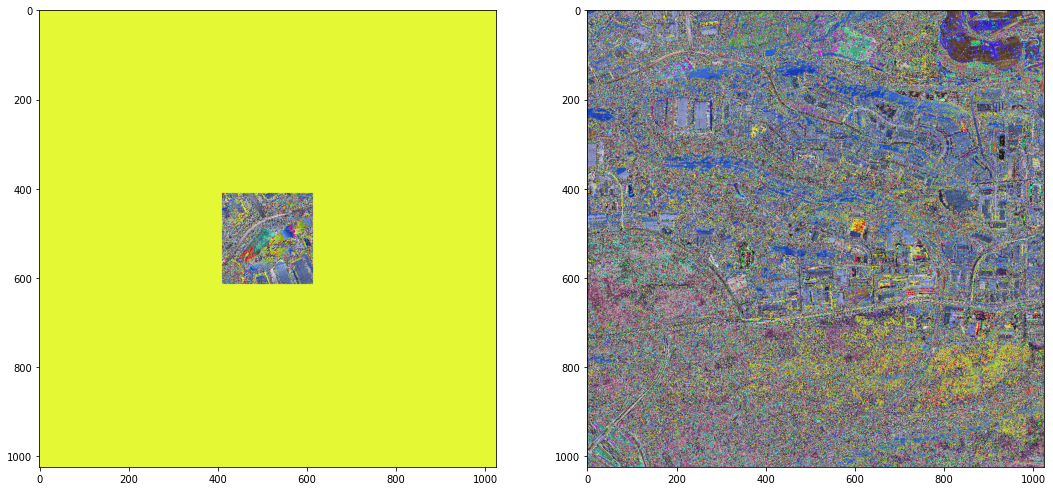

In [18]:
fig, ax = plt.subplots(1,2,figsize=(18,12))

img = transforms.ToPILImage()(x[0])
patch = transforms.ToPILImage()(x[1])
ax[0].imshow(img)
ax[1].imshow(patch)

In [19]:
feature_A = FeatureExtraction(x[0].unsqueeze(0).cuda())
feature_B = FeatureExtraction(x[1].unsqueeze(0).cuda())
feature_A = Feature2Pearson(feature_A)
feature_B = Feature2Pearson(feature_B)
correlation = FeatureCorrelation(feature_A,feature_B)
correlation = FeatureL2Norm(ReLU(correlation))

labels = x[2]
model.eval()
with torch.no_grad():
    y_pred = model(correlation)

In [24]:
y_pred[0][0] * 1024, y_pred[0][1] * 1024, y_pred[0][2] * 360

(tensor(296.7695, device='cuda:0'),
 tensor(342.2722, device='cuda:0'),
 tensor(336.8972, device='cuda:0'))

In [25]:
labels * x[1].shape[-1]

tensor([218.2000, 133.0000,  73.9556])

In [30]:
model = MultiModel()
model.load_state_dict(torch.load('multi_model.pth'))
model = model.cuda()

In [31]:
cos = nn.CosineSimilarity(dim=0)

t_seq = iaa.Sequential([
    iaa.Resize((512,512))
])

def get_embs(x,y,a):
    frag = get_fragment(x, y, a)
    frag = t_seq(images=[frag])[0]
    frag = transforms.ToTensor()(frag)
    frag = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])(frag)
    emb_frag, y_pred_frag = model(frag.unsqueeze(0).float().cuda())
    return emb_frag

def best_match(emb, x, y, a, dx=10, da=10, mx=2000, ma=100):
    best_score = -1e9
    best_params = (x,y,a)
     
    for ax in range(-mx,mx+1,dx):
        xx = x + ax
        if (xx < 512) | (xx >= 10496-512):
            continue
        for ay in range(-mx,mx+1,dx):
            yy = y + ay
            if (yy < 512) | (yy >= 10496-512):
                continue
            for aa in range(-ma,ma+1,da):
                angle = a + aa
                if angle < 0:
                    angle += 360
                if angle >= 360:
                    angle -= 360
                embs_frag = get_embs(xx,yy,angle)
                score = cos(emb[0], embs_frag[0]).item()
                if score > best_score:
                    best_score = score
                    best_params = (xx,yy,angle)
                    print(best_score, best_params)
                    
    return best_params

In [33]:
import glob

class ImageDatasetTrain(Dataset):
    def __init__(self, transform=None):
        self.files = glob.glob('./train/img/*')
        self.transform = transform
        self.norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])

    def __getitem__(self, idx):
        fl = self.files[idx]
        center_x = data_df.loc[data_df['id'] == fl].center_x.astype(float).values[0]
        center_y = data_df.loc[data_df['id'] == fl].center_y.astype(float).values[0]
        c_angle = data_df.loc[data_df['id'] == fl].angle.astype(float).values[0]
        image = np.array(Image.open(self.files[idx]))
        if self.transform is not None:
            image = self.transform(images=[image])[0]
        image = transforms.ToTensor()(image)
        image = self.norm(image)

        orig =  get_fragment(center_x, center_y, c_angle)
        if self.transform is not None:
            orig = self.transform(images=[orig])[0]
        orig = transforms.ToTensor()(orig)
        orig = self.norm(orig)
        
        return image, self.files[idx], orig
    
    def __len__(self):
        return len(self.files)

t_dataset = ImageDatasetTrain(t_seq)

x_metr, y_metr, a_metr, emb_dist = [], [], [], []

model.eval()
preds = []
with torch.no_grad():
    for img, fle, orig in t_dataset:
        emb, y_pred = model(img.unsqueeze(0).float().cuda())
        
        center_x = data_df.loc[data_df['id'] == fle].center_x.astype(float).values[0]
        center_y = data_df.loc[data_df['id'] == fle].center_y.astype(float).values[0]
        c_angle = data_df.loc[data_df['id'] == fle].angle.astype(float).values[0]
        true_frag = get_embs(center_x, center_y, c_angle)
        emb_dist.append(cos(emb[0], true_frag[0]).item())
        
        y_pred = y_pred.squeeze().clip(0,1)
        
        x0, y0, a0 = y_pred[0].item(), y_pred[1].item(), y_pred[2].item()
        preds.append((fle,x0,y0,a0))
        x_metr.append(abs(x0-center_x / 10496.0))
        y_metr.append(abs(y0-center_y / 10496.0))
        a_metr.append(abs(a0-c_angle / 360.0))
        print(len(emb_dist), round(x_metr[-1]*0.35+y_metr[-1]*0.35+a_metr[-1]*0.3, 3), round(emb_dist[-1],3))
                
metric = np.array(x_metr) *0.35 + np.array(y_metr) *0.35 + np.array(a_metr) *0.3

print(np.mean(metric))
print(round(np.mean(x_metr),3),
      round(np.mean(y_metr),3),
      round(np.mean(a_metr),3),
      round(np.mean(emb_dist),3)
     )

1 0.071 0.774
2 0.129 0.731
3 0.015 0.794
4 0.14 0.713
5 0.025 0.789
6 0.123 0.152
7 0.206 0.531
8 0.129 0.745
9 0.02 0.804
10 0.037 0.877
11 0.031 0.82
12 0.022 0.822
13 0.079 0.66
14 0.045 0.812
15 0.423 0.12
16 0.159 0.65
17 0.032 0.726
18 0.044 0.773
19 0.129 0.075
20 0.093 0.721
21 0.039 0.81
22 0.107 0.627
23 0.152 0.623
24 0.44 0.435
25 0.068 0.729
26 0.187 0.624
27 0.261 0.366
28 0.096 0.18
29 0.285 0.119
30 0.247 0.329
31 0.273 0.191
32 0.099 0.724
33 0.088 0.712
34 0.082 0.719
35 0.195 0.585
36 0.213 0.659
37 0.027 0.848
38 0.045 0.855
39 0.289 0.06
40 0.039 0.777
41 0.025 0.732
42 0.017 0.775
43 0.267 0.171
44 0.047 0.648
45 0.043 0.798
46 0.143 0.608
47 0.185 0.483
48 0.091 0.785
49 0.036 0.727
50 0.151 0.684
51 0.074 0.692
52 0.067 0.597
53 0.025 0.798
54 0.175 0.07
55 0.087 0.825
56 0.013 0.747
57 0.179 0.43
58 0.202 0.56
59 0.048 0.64
60 0.077 0.708
61 0.162 0.525
62 0.026 0.719
63 0.015 0.866
64 0.133 0.52
65 0.041 0.782
66 0.056 0.589
67 0.373 0.291
68 0.047 0.82
69 0.

528 0.037 0.755
529 0.057 0.799
530 0.038 0.704
531 0.033 0.761
532 0.045 0.672
533 0.462 0.05
534 0.19 0.68
535 0.078 0.72
536 0.036 0.563
537 0.192 0.146
538 0.08 0.758
539 0.028 0.721
540 0.124 0.616
541 0.238 0.283
542 0.026 0.834
543 0.05 0.906
544 0.261 0.104
545 0.088 0.377
546 0.074 0.726
547 0.093 0.67
548 0.258 0.06
549 0.11 0.598
550 0.039 0.829
551 0.044 0.883
552 0.153 0.674
553 0.058 0.707
554 0.361 0.559
555 0.027 0.767
556 0.164 0.104
557 0.09 0.673
558 0.178 0.491
559 0.05 0.772
560 0.043 0.737
561 0.183 0.343
562 0.162 0.519
563 0.308 0.113
564 0.076 0.801
565 0.024 0.828
566 0.026 0.776
567 0.05 0.696
568 0.033 0.707
569 0.116 0.725
570 0.052 0.709
571 0.036 0.615
572 0.029 0.76
573 0.276 0.318
574 0.058 0.723
575 0.064 0.715
576 0.341 0.169
577 0.03 0.765
578 0.096 0.731
579 0.02 0.826
580 0.44 0.175
581 0.062 0.626
582 0.066 0.691
583 0.035 0.794
584 0.026 0.767
585 0.044 0.64
586 0.09 0.688
587 0.069 0.718
588 0.062 0.26
589 0.185 0.092
590 0.154 0.524
591 0.075 0

KeyboardInterrupt: 

In [34]:
train_preds = list(preds)

In [64]:
print(cx,cy)
print(center_x, center_y)

0.35021111369132996 0.44898730516433716
5306.0 5785.0


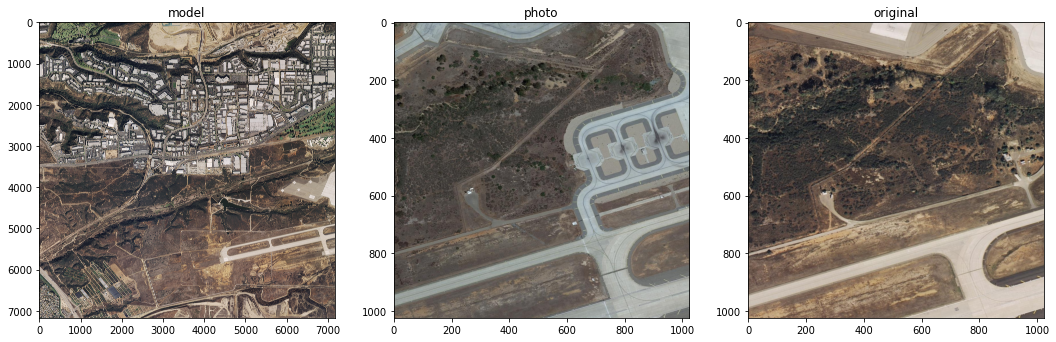

In [67]:
i = 158
fl,cx,cy,cn = train_preds[i]
center_x = data_df.loc[data_df['id'] == fl].center_x.astype(float).values[0]
center_y = data_df.loc[data_df['id'] == fl].center_y.astype(float).values[0]
c_angle = data_df.loc[data_df['id'] == fl].angle.astype(float).values[0]

fragment = get_fragment(cx*10496,cy*10496,0,7)
fig, ax = plt.subplots(1,3,figsize=(18,9))
ax[0].imshow(fragment)
ax[0].set_title('model')
img = np.array(Image.open(fl))
ax[1].imshow(img)
ax[1].set_title('photo');
img = get_fragment(center_x, center_y, c_angle)
ax[2].imshow(img)
ax[2].set_title('original');

In [62]:
#0.11918744307641446
#0.121 0.085 0.157 0.602 #sub -> .891709

In [ ]:
#0.12937932624452828
#0.119 0.102 0.173 0.639

In [216]:
#0.1238772843091709
#0.119 0.092 0.167 0.64

In [ ]:
#0.12248007931927354
#0.127 0.092 0.153 0.645

In [ ]:
#0.1307470550478529
#0.125 0.081 0.196 0.67 #sub -> .874735

In [ ]:
#0.12774057795109786
#0.125 0.098 0.165 0.659

In [ ]:
#0.13120529380614843
#0.122 0.096 0.183 0.675

In [ ]:
#0.13265289970157038
#0.13 0.1 0.174 0.682

In [ ]:
#0.13128069625277095
#0.133 0.088 0.18 0.694

In [ ]:
#0.1355302990374602
#0.138 0.102 0.172 0.7

In [ ]:
#0.14354898508000122
#0.16 0.096 0.18 0.432

In [271]:
!mkdir sub_multi2

In [272]:
import glob
import json

class ImageDatasetTest(Dataset):
    def __init__(self, transform=None):
        self.files = glob.glob('./test/*')
        self.transform = transform
        self.norm = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])

    def __getitem__(self, idx):
        fl = self.files[idx]
        image = np.array(Image.open(self.files[idx]))
        if self.transform is not None:
            image = self.transform(images=[image])[0]
        image = transforms.ToTensor()(image)
        image = self.norm(image)

        return image, self.files[idx]
    
    def __len__(self):
        return len(self.files)

test_dataset = ImageDatasetTest(t_seq)

model.eval()
preds = []
with torch.no_grad():
    for img, fle in test_dataset:
        emb, y_pred = model(img.unsqueeze(0).float().cuda())
        y_pred = y_pred.squeeze().clip(0,1)
        x,y,a = y_pred[0].item() * 10496, y_pred[1].item() * 10496, y_pred[2].item() * 360
        preds.append((fle,x,y,a))
        
for i in range(len(preds)):
    fl,cx,cy,cn = preds[i]
    fl = './sub_multi2/' + fl.split('/')[-1].split('.')[0] + '.json'
    
    center_x = int(cx)
    center_y = int(cy)
    angle = int(cn)
    
    image_center = (center_x, center_y)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
        
    size_m = 1
    new_min_x = int(max(cntr[0]-512*size_m, 0))
    new_max_x = int(min(cntr[0]+512*size_m, 10496))
    new_min_y = int(max(cntr[1]-512*size_m, 0))
    new_max_y = int(min(cntr[1]+512*size_m, 10496))
    
    r =\
    {"left_top": [new_min_x, new_min_y], 
     "right_top": [new_max_x, new_min_y], 
     "left_bottom": [new_min_x, new_max_y], 
     "right_bottom": [new_max_x, new_max_y], 
     "angle": angle}
    with open(fl, 'w') as fp:
        json.dump(r, fp)

In [ ]:
i=5
fle,cx,cy,cn = preds[i]
fragment = get_fragment(cx,cy,cn)
fig, ax = plt.subplots(1,2,figsize=(18,9))
ax[0].imshow(fragment)
ax[0].set_title('model')
img = np.array(Image.open(fle))
ax[1].imshow(img)
ax[1].set_title('photo');

In [ ]:
from imageio import imwrite

im1 = get_fragment(4000,4000,203)
im2 = get_fragment(4000,4000,0,3)
imwrite('ex1_target.png', im1)
imwrite('ex1_patch.png', im2)
data_df.sample(3)
!cp ./train/img/481.png ex2_target.png
im2 = get_fragment(9457,5900,0,3)
imwrite('ex2_patch.png', im2)